<a href="https://colab.research.google.com/github/danisa-loop/DS/blob/main/TP_Individual_Putrino_DM_1C2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP de regresión (properati)
Programa de creación de entregas. Versión 1

In [ ]:
import pandas as pd

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Lectura de datos

In [ ]:
DIR = "/content/drive/MyDrive/DM/DM"
# funcionan archivos .zip directamente

In [ ]:
df_train = pd.read_csv(f"{DIR}/entrenamiento.csv", index_col="id")
df_train.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,NaN,...,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,NaN,...,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,NaN,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,NaN,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


In [ ]:
df_test = pd.read_csv(f"{DIR}/a_predecir.csv", index_col="id")
df_test.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
736772,Propiedad,2020-01-18,2020-09-20,2020-01-18,-58.452877,-34.644650,Argentina,Capital Federal,Flores,NaN,...,1.0,61.0,53.0,USD,NaN,Varela 1400 PB - U$D 98.000 - Tipo casa PH e...,Departamento tipo casa en Flores. Excelente es...,Casa,Venta,NaN
333658,Propiedad,2019-07-21,2020-02-08,2019-07-21,-58.500027,-34.628754,Argentina,Capital Federal,Floresta,NaN,...,3.0,198.0,124.0,USD,NaN,Cervantes 1000 duplex - U$D 299.900 - Tipo ...,CERVANTES 1047entre Murature y Cesar Diaz cerq...,Casa,Venta,NaN
195920,Propiedad,2020-05-19,2020-09-23,2020-05-19,-58.496326,-34.582832,Argentina,Capital Federal,Villa Pueyrredón,NaN,...,NaN,145.0,115.0,USD,NaN,Av Gral Mosconi 2400 - U$D 215.000 - Tipo cas...,"Avenida mosconi 2400 ,Villa pueyrredon ph cont...",Casa,Venta,NaN
613603,Propiedad,2019-09-11,2019-09-18,2019-09-11,-58.480350,-34.685078,Argentina,Capital Federal,Villa Lugano,NaN,...,3.0,251.0,200.0,USD,NaN,Guamini 4600 - U$D 330.000 - Casa en Venta,EXCEPCIONAL CASA A TERMINAR DE 5 AMBIENTES CO...,Casa,Venta,NaN
15011,Propiedad,2019-11-25,2020-03-04,2019-11-25,-58.509136,-34.599274,Argentina,Capital Federal,Villa Devoto,NaN,...,3.0,440.0,270.0,USD,NaN,Joaquin V Gonzalez 3900 - U$D 700.000 - Casa ...,"RETIRO 10 X 5 - INGRESO - HALL - LIVING 6 X 5,...",Casa,Venta,NaN


# 1. Entender los datos (AID) -- 🔎🔎🔎 MODIFICAR 🔎🔎🔎

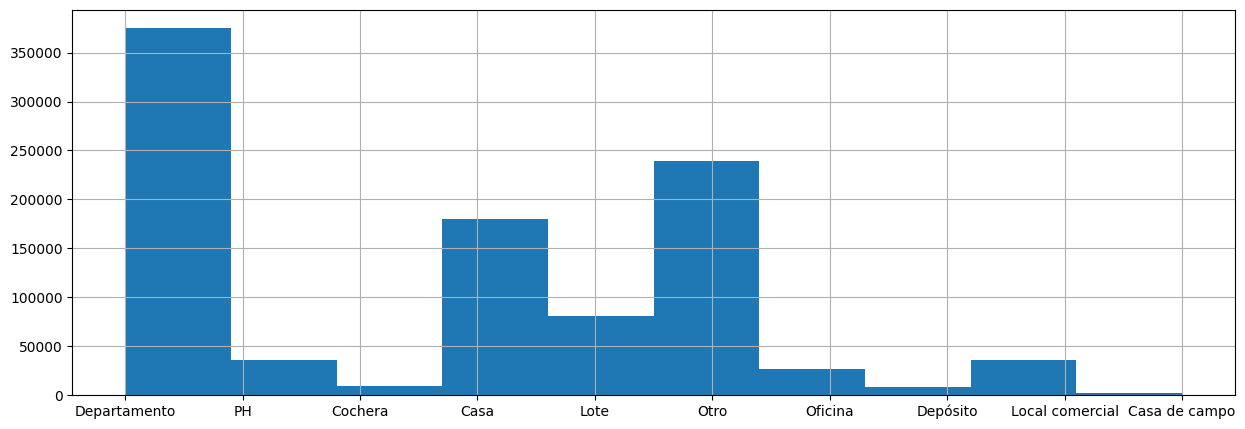

In [ ]:
df_train["property_type"].hist(figsize=(15,5));

# 2. Limpieza y transformación de datos (MD) -- 🧹🧹🧹 MODIFICAR 🧹🧹🧹

In [ ]:
# Selección de datos. Solo a fines demostrativos. Cambiar!
df_train = df_train.loc[(df_train["l2"] == "Córdoba") & (df_train["operation_type"] == 'Venta') & (df_train["property_type"] == "Casa")]
df_train.shape

(11100, 24)

In [ ]:
# La creación de modelos requiere que no haya valores perdidos
# Llenamos todo con 0 a lo bestia
# TODO: mejorar la imputación de valores perdidos
df_train.fillna(0, inplace=True, downcast= "infer")
df_test.fillna(0, inplace=True, downcast= "infer")

# 3. Entrenamiento del modelos (AA) -- ⛔⛔⛔ NO TOCAR ⛔⛔⛔

In [ ]:
# La creación de modelos requiere que todo el dataframe sea numérico
# Me quedo con las columnas numéricas solamente
# TODO: traducir las columnas con datos no numéricos a numéricos para que mejoren los modelos
df_train = df_train.select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool'])

X = df_train[df_train.columns.drop('price')]
y = df_train['price']

In [ ]:
for n_estimators in [50, 100, 500, 1000]:
    for max_depth in [5, 10, 15, 30]:
        print(f"{n_estimators=} -- {max_depth=}")

        # Creamos el modelo
        reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42)

        scores_train = []
        scores_test = []

        # Validación cruzada, 10 folds, shuffle antes, semilla aleatoria
        kf = sk.model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

        for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
            # Partimos el fold en entrenamiento y prueba...
            X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

            # Entrenamos el modelo en entramiento
            reg.fit(X_train, y_train)

            # Predecimos en train
            y_pred = reg.predict(X_train)

            # Medimos la performance de la predicción en entramiento
            score_train = sk.metrics.mean_squared_error(y_train, y_pred, squared=False)
            scores_train.append(score_train)

            # Predecimos en test
            y_pred = reg.predict(X_test)

            # Medimos la performance de la predicción en prueba
            score_test = sk.metrics.mean_squared_error(y_test, y_pred, squared=False)
            scores_test.append(score_test)

            print("\t", f"{fold=}, {score_train=} {score_test=}")

        print(f"Media de scores en entrenamiento={pd.Series(scores_train).mean()}, std={pd.Series(scores_train).std()}")
        print(f"Media de scores en prueba={pd.Series(scores_test).mean()}, std={pd.Series(scores_test).std()}")
        print()

n_estimators=50 -- max_depth=5
	 fold=0, score_train=5586690.199068769 score_test=902659.6993365027
	 fold=1, score_train=5326506.678744269 score_test=4020502.278111609
	 fold=2, score_train=4922882.493251064 score_test=8002496.714167014
	 fold=3, score_train=5104910.454764606 score_test=6149694.981161414
	 fold=4, score_train=5519404.651027904 score_test=3323889.375701056
	 fold=5, score_train=5498153.95105028 score_test=3919826.925678682
	 fold=6, score_train=4597030.141153111 score_test=9917673.260062015
	 fold=7, score_train=5598133.895801394 score_test=1110391.598143915
	 fold=8, score_train=5401323.526315203 score_test=3963868.072614448
	 fold=9, score_train=5268775.731733688 score_test=5757142.3928039
Media de scores en entrenamiento=5282381.172291029, std=323481.4834670866
Media de scores en prueba=4706814.529778055, std=2831574.742028583

n_estimators=50 -- max_depth=10
	 fold=0, score_train=4399483.616129905 score_test=1860800.888279026
	 fold=1, score_train=4295083.489715615

# 4. Predicción para kaggle -- ⚠️⚠️⚠️ MODIFICAR HIPERPARÁMETROS ⚠️⚠️⚠️


In [ ]:
## Datos a predecir
X = df_train[df_train.columns.drop('price')]
y = df_train['price']

X_test = df_test[df_train.columns.drop('price')]

# Entrenamos el modelo usando todos los datos de entrenamiento
# TODO: Poner los valores de hiperparámetros que mejor dieron en el paso anterior
n_estimators = 50
max_depth = 10
reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42)
reg.fit(X, y)

# Predecimos
df_test['price'] = reg.predict(X_test)

# Creamos el dataframe para entregar
df_sol = df_test[["price"]]

In [ ]:
# Tests de validación de la predicción antes de subirla
# Estos tests TIENEN que pasar sin error

assert (df_sol["price"] <= 0).sum() == 0, "Hay predicciones de precios menores o iguales a 0."
assert df_sol.shape[0] == 7808, f"La cantidad de filas no es correcta. Es {df_sol.shape[0]} y debe ser 7808."
assert df_sol.shape[1] == 1, f"La cantidad de columnas no es correcta. Es {df_sol.shape[1]} y debe ser 1."
assert 'price' in df_sol.columns, "Falta la columna 'price'."
assert df_sol.index.name == 'id', "El índice debe llamarse 'id'."

In [ ]:
# Grabamos el archivo para subir a kaggle
# TODO: Cambiar la versión y llevar registro

version = "v001"
df_test['price'].to_csv(f"{DIR}/solucion-{version}.csv", index=True)